## Example

<img src="IMG_0675.JPG">

$\Delta=30mm$

$F_o=200N, \omega\in\left<10,20\right>s^{-1}$

$m_1=10kg, m_2=5kg$

$L_1=0.2m, b=100N/ms^{-1}$

$L_2=0.4m, k_1=10^4Nm^{-1}$

$L=0.6m, k_2=5.10^3Nm^{-1}$

$L_3=0.2m, L_4=0.1m, R=0.1m$

### Movement equation

$M\ddot{q}+B\dot{q}+Kq=Q_0\sin\left(\omega.t\right)$

### Natural frequency

$\Omega_0=\sqrt{\frac{K}{M}}$

### Dumping ratio

$b_r=\frac{B}{2M\Omega_0}$

### Amplitude

$q=\frac{Q_0}{K\sqrt{\left(1-\frac{\omega_b^2}{\Omega_0^2}\right)^2 + \left(2b_r\frac{\omega_b}{\Omega_0}\right)^2}}$

## Solution

<img src="IMG_0118.JPG">

In [4]:
I = (1/12.)*10*0.6**2 + 10*0.1**2 + 0.5*0.1**2 + 5*(0.4+0.1)**2
M = I / (0.4+0.1)**2
B = 100
K = 10**4*(0.2/(0.4+0.1))**2 + 5*10**3
Q = 200 * 0.2/(0.4+0.1)
print('I =', I)
print('M =', M)
print('B =', B)
print('K =', K)
print('Q =', Q)

I = 1.655
M = 6.62
B = 100
K = 6600.0
Q = 80.0


In [5]:
import pylab as plt
import numpy as np

class Example2():
    M = 6.62 
    B = 100.0
    K = 6600.0
    Q = 80.0

def amplitude(Q, K, br, OMEGA0, omega_b):
    return Q / (K * np.sqrt( (1-(omega_b**2/OMEGA0**2))**2 + (2*br*omega_b/OMEGA0)**2 ) )

data = Example2()

OMEGA0 = np.sqrt(data.K / data.M)
print('Natural frequency  %6.3f [1/s]' % OMEGA0)

br0 = data.B / (2 * data.M * OMEGA0)
print('Dumping ratio      %6.3f [-]' % br0)

A0 = amplitude(data.Q, data.K, br0, OMEGA0, 20)
print('Maximum amplitude  %6.6f [m]' % A0)


Natural frequency  31.575 [1/s]
Dumping ratio       0.239 [-]
Maximum amplitude  0.018062 [m]


## Amplitude-frequency characteristics

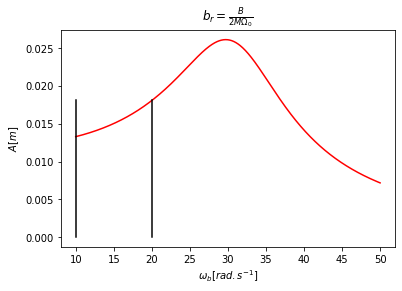

In [6]:
omega_b = np.linspace(10, 50, 1000)
A = amplitude(data.Q, data.K, br0, OMEGA0, omega_b)

plt.plot(omega_b, A, 'r-')
plt.plot([10, 10], [0, A0], 'k-')
plt.plot([20, 20], [0, A0], 'k-')
plt.title(r'$b_r=\frac{B}{2M\Omega_0}$')
plt.xlabel('$\omega_b [rad.s^{-1}]$')
plt.ylabel('$A[m]$')

plt.show()

## Various dumping ratios $b_r\in\left<0.05,1\right>$

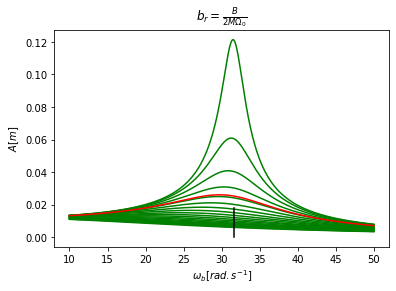

In [7]:
omega_b = np.linspace(10, 50, 1000) 

br_data = np.linspace(0.05, 1, 20)
for br in br_data:
    A = amplitude(data.Q, data.K, br, OMEGA0, omega_b)
    plt.plot(omega_b, A, 'g-')

A = amplitude(data.Q, data.K, br0, OMEGA0, omega_b)
plt.plot(omega_b, A, 'r-')
plt.plot([OMEGA0, OMEGA0], [0, A0], 'k-')
plt.title(r'$b_r=\frac{B}{2M\Omega_0}$')
plt.xlabel('$\omega_b [rad.s^{-1}]$')
plt.ylabel('$A[m]$')

plt.show()
